# MNIST Dataset - Handwritten Digits Recognition

**The objective of this study is to perform image recognition on handwritten digits.**

We will be answering the following questions : 
- What is the best performing model ? 
- Will the models recognize our own hadwriting ? 
- What is the best model to generate new data ?
- Will you be able to distinguish fake from real data ?

## Import the data

In [ ]:
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

In [ ]:
!gunzip t*-ubyte.gz

In [ ]:
#!pip install mlxtend

In [1]:
from mlxtend.data import loadlocal_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train, y_train = loadlocal_mnist(
        images_path='data/train-images-idx3-ubyte', 
        labels_path='data/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(images_path = 'data/t10k-images-idx3-ubyte', 
                                labels_path = 'data/t10k-labels-idx1-ubyte')

In [5]:
print('Dimensions: %s x %s' % (X_train.shape[0], X_train.shape[1]))
print('\n1st row', X_train[0])

Dimensions: 60000 x 784

1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 1

In [7]:
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(y_train))
print('Class distribution: %s' % np.bincount(y_train))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

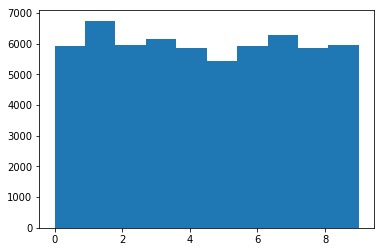

In [8]:
plt.hist(y_train)

In [ ]:
#Store as CSV files
np.savetxt(fname='images_train.csv', 
           X=X_train, delimiter=',', fmt='%d')
np.savetxt(fname='labels_train.csv', 
           X=y_train, delimiter=',', fmt='%d')

In [ ]:
np.savetxt(fname='images_test.csv', 
           X=X_test, delimiter=',', fmt='%d')
np.savetxt(fname='labels_test.csv', 
           X=y_test, delimiter=',', fmt='%d')

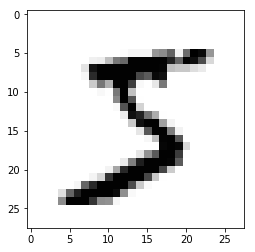

In [9]:
#Show first digit 
pixels = X_train[0].reshape((28,28))
plt.imshow(pixels, cmap = 'Greys')

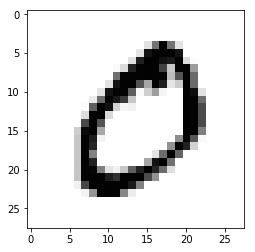

In [10]:
pixels = X_train[1].reshape((28,28))
plt.imshow(pixels, cmap = 'Greys')

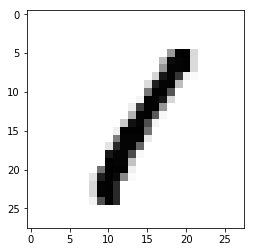

In [11]:
pixels = X_train[3].reshape((28,28))
plt.imshow(pixels, cmap = 'Greys')

## Reshaping and Normalizing the images

In [12]:
#https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in X_train 60000
Number of images in X_test 10000


## CNN

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [14]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=10)

In [ ]:
model.evaluate(X_test, y_test)

Prediction error : 98,5%

In [ ]:
image_index = 222
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')

In [ ]:
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [ ]:
image_index = 292
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')

In [ ]:
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

## SVM

**To do** : With some classification methods (particuarly template-based methods, such as SVM and K-nearest neighbors), the error rate improves when the digits are centered by bounding box rather than center of mass.

In [ ]:
from sklearn import datasets, svm, metrics
import pandas as pd

In [ ]:
images_train = pd.read_csv("images_train.csv")
labels_train = pd.read_csv("labels_train.csv")
images_test = pd.read_csv("images_test.csv")
labels_test = pd.read_csv("labels_test.csv")

In [ ]:
param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C,gamma=param_gamma)

In [ ]:
classifier.fit(images_train, labels_train)

In [ ]:
predicted = classifier.predict(data_test)

In [ ]:
classifier.evaluate(images_test, labels_test)